In [15]:
import re
import matplotlib.pyplot as plt

In [16]:
def get_data(file: str) -> list[int]:
    with open(file, mode='r') as f:
        result = re.findall(r'aep_cycles\(-100\)=(\d+)', f.read())
    return [int(_) for _ in result]

In [17]:
class KalmanFilter1D:
    def __init__(self, initial_state, initial_covariance, process_variance, measurement_variance):
        # Initial estimates
        self.estimated_state = initial_state
        self.estimated_covariance = initial_covariance
        
        # Variance
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance

    def predict(self, control_input=0, control_matrix=0):
        # In the 1D case, A = 1, B = control_matrix, u = control_input
        # Predicted state estimate: x̂(k|k-1) = A*x̂(k-1|k-1) + B*u(k)
        self.estimated_state = self.estimated_state + control_matrix * control_input
        
        # Predicted estimate covariance: P(k|k-1) = A*P(k-1|k-1)*A' + Q
        self.estimated_covariance = self.estimated_covariance + self.process_variance
        return self.estimated_state

    def update(self, measurement):
        # Kalman gain: K = P(k|k-1) / (P(k|k-1) + R)
        kalman_gain = self.estimated_covariance / (self.estimated_covariance + self.measurement_variance)
        
        # Updated state estimate: x̂(k|k) = x̂(k|k-1) + K*(z(k) - x̂(k|k-1))
        self.estimated_state = self.estimated_state + kalman_gain * (measurement - self.estimated_state)
        
        # Updated estimate covariance: P(k|k) = (1-K)*P(k|k-1)
        self.estimated_covariance = (1 - kalman_gain) * self.estimated_covariance
        return self.estimated_state

In [22]:

result = get_data('test/output_mnist_lenet_m5d22y2023_h22m13s11.txt')

conv1 = result[23-21:3646-21]
kf_conv1 = KalmanFilter1D(initial_state=conv1[0], initial_covariance=1, process_variance=0.01, measurement_variance=0.5)
predicted_conv1 = []
estimated_conv1 = []

maxpool = result[2658422-21:2678419-21]
kf_maxpool = KalmanFilter1D(initial_state=maxpool[0], initial_covariance=1, process_variance=0.01, measurement_variance=0.5)
predicted_maxpool = []
estimated_maxpool = []

maxpool2 = result[4109486-21:4129483-21]
# maxpool2.reverse()
kf_maxpool2 = KalmanFilter1D(initial_state=maxpool2[0], initial_covariance=1, process_variance=0.01, measurement_variance=0.5)
predicted_maxpool2 = []
estimated_maxpool2 = []

for measurement in conv1:
    predicted_conv1.append(kf_conv1.predict())
    estimated_conv1.append(kf_conv1.update(measurement))

for measurement in maxpool:
    predicted_maxpool.append(kf_maxpool.predict())
    estimated_maxpool.append(kf_maxpool.update(measurement))

for measurement in maxpool2:
    predicted_maxpool2.append(kf_maxpool2.predict())
    estimated_maxpool2.append(kf_maxpool2.update(measurement))

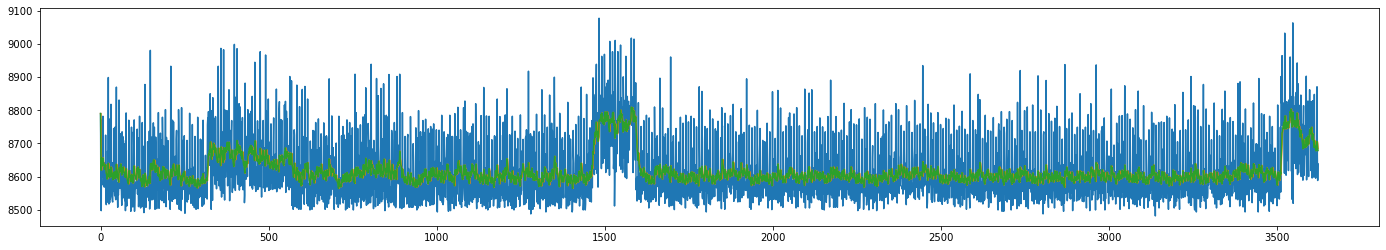

In [23]:
plt.figure(figsize=(24, 4))
plt.plot(list(range(len(conv1))), conv1)
plt.plot(list(range(len(predicted_conv1))), predicted_conv1)
plt.plot(list(range(len(estimated_conv1))), estimated_conv1)

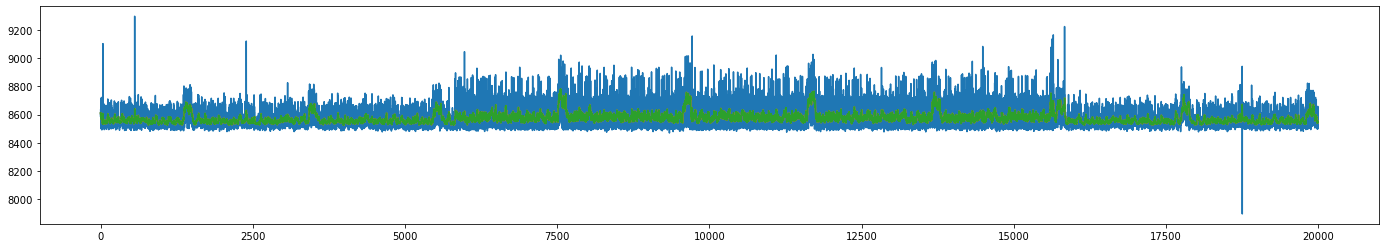

In [24]:
plt.figure(figsize=(24, 4))
plt.plot(list(range(len(maxpool))), maxpool)
plt.plot(list(range(len(predicted_maxpool))), predicted_maxpool)
plt.plot(list(range(len(estimated_maxpool))), estimated_maxpool)

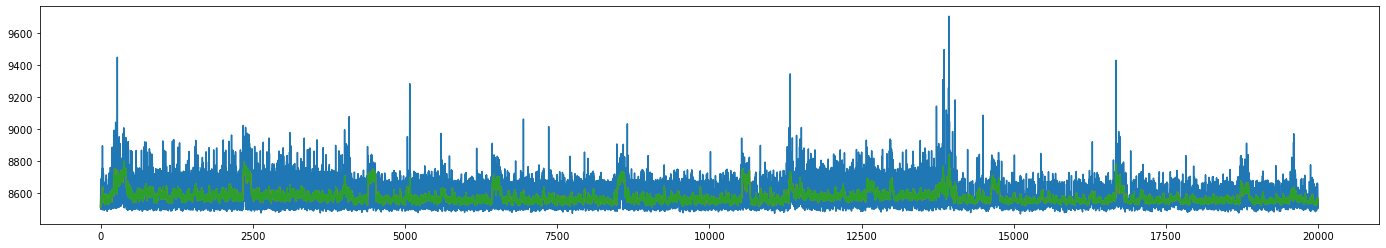

In [25]:
plt.figure(figsize=(24, 4))
plt.plot(list(range(len(maxpool2))), maxpool2)
plt.plot(list(range(len(predicted_maxpool2))), predicted_maxpool2)
plt.plot(list(range(len(estimated_maxpool2))), estimated_maxpool2)